# Estudio de los datos con un modelo de regresión lineal.

En principio se intentaba determinar la nota dependiendo únicamente de las características sociales.
Tras el estudio se vió que salvo unas características muy específicas la correlacionalidad no era lo suficientemente fuerte para determinar la nota, por lo que se integró la nota de escritura y lectura para poder determinar la de matemáticas por su fuerte correlación. Se estudian modelos de árboles de decisión y modelos lineales para determinar cual es el modelo más óptimo. Cuando se utilizaban los datos únicamente sociales se veía una fuerte linealidad en los datos por lo que se entiende que seguramente un modelo lineal será el más adecuado para este tipo de datos.

OBTENER LOS DATOS:

* El dataset que estoy utilizando pertenece a Kaggle y permite su uso, por lo que no necesito de ningún permiso adicional.

In [1]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el CSV desde la ruta Github
url="https://raw.githubusercontent.com/Aiadevop/math_student_grade/refs/heads/main/data/processed/df_linear.csv"
df = pd.read_csv(url)

# Mostrar las primeras filas
df.head(10)

,math_score,reading_score,writing_score,lunch,race_ethnicity_group_E,test_preparation_course,gender,parental_level_of_education_high_school
0,72,72,74,1,0.0,0,0,0.0
1,69,90,88,1,0.0,1,0,0.0
2,90,95,93,1,0.0,0,0,0.0
3,47,57,44,0,0.0,0,1,0.0
4,76,78,75,1,0.0,0,1,0.0
5,71,83,78,1,0.0,0,0,0.0
6,88,95,92,1,0.0,1,0,0.0
7,40,43,39,0,0.0,0,1,0.0
8,64,64,67,0,0.0,1,1,1.0
9,38,60,50,0,0.0,0,0,1.0


In [2]:
# En los modelos de regresión lineal a menudo mejora el rendimiento del modelo escalando las variables.
# Escalo las Variablesfrom sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
# Copiamos el DF numérico ya preparado
df_scaled = df.copy()

# Columnas que queremos escalar (todas las numéricas, incluidas dummy)
cols_to_scale = df_scaled.columns

# Inicializamos el scaler
scaler = StandardScaler()

# Ajustamos y transformamos
scaled_array = scaler.fit_transform(df_scaled[cols_to_scale])

# Creamos nuevo DataFrame con los valores escalados
df_scaled = pd.DataFrame(scaled_array, columns=cols_to_scale, index=df_scaled.index)

# Vista rápida
df_scaled.head()

,math_score,reading_score,writing_score,lunch,race_ethnicity_group_E,test_preparation_course,gender,parental_level_of_education_high_school
0,0.390024,0.193999,0.391492,0.741881,-0.403473,-0.746748,-0.964625,-0.493742
1,0.192076,1.427476,1.313269,0.741881,-0.403473,1.339140,-0.964625,-0.493742
2,1.577711,1.770109,1.642475,0.741881,-0.403473,-0.746748,-0.964625,-0.493742
3,-1.259543,-0.833899,-1.583744,-1.347925,-0.403473,-0.746748,1.036672,-0.493742
4,0.653954,0.605158,0.457333,0.741881,-0.403473,-0.746748,1.036672,-0.493742


In [3]:
# Obtener los parámetros del scaler
scaler_mean = scaler.mean_
scaler_scale = scaler.scale_

# Mostrar los parámetros
print("Media del scaler:")
print(scaler_mean)
print("\nDesviación estándar del scaler:")
print(scaler_scale)

print("\nParámetros como listas:")
print("Mean:", scaler_mean.tolist())
print("Scale:", scaler_scale.tolist())

Media del scaler:
[66.089 69.169 68.054  0.645  0.14   0.358  0.482  0.196]

Desviación estándar del scaler:
[15.15549666 14.59289002 15.18805728  0.47851332  0.34698703  0.47941214
  0.49967589  0.39696851]

Parámetros como listas:
Mean: [66.089, 69.169, 68.054, 0.645, 0.14, 0.358, 0.482, 0.196]
Scale: [15.155496659628149, 14.592890015346516, 15.188057281956768, 0.478513322698543, 0.34698703145794946, 0.47941214002150595, 0.4996758949559204, 0.3969685126052191]


In [4]:
from sklearn.model_selection import train_test_split

# 1️⃣ Separar X (features) e y (target)
X = df_scaled.drop(['math_score'], axis=1)
y = df_scaled['math_score']

# 2️⃣ Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# 3️⃣ Verificar tamaños y distribución
print(f"Tamaño X_train: {X_train.shape}")
print(f"Tamaño X_test: {X_test.shape}")

print("\nDistribución y_train:")
print(y_train.describe())

print("\nDistribución y_test:")
print(y_test.describe())


Tamaño X_train: (800, 7)
Tamaño X_test: (200, 7)

Distribución y_train:
count    800.000000
mean       0.026871
std        0.991343
min       -3.832867
25%       -0.599716
50%       -0.005872
75%        0.719937
max        2.237538
Name: math_score, dtype: float64

Distribución y_test:
count    200.000000
mean      -0.107486
std        1.031867
min       -4.360728
25%       -0.731682
50%       -0.005872
75%        0.653954
max        2.237538
Name: math_score, dtype: float64


In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Diccionario con los modelos a probar
modelos = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5)
}

# DataFrame para guardar resultados
resultados = []

# Entrenar y evaluar cada modelo
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    resultados.append({
        "Modelo": nombre,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2
    })

    if nombre == "LinearRegression":
      lin_reg = modelo

# Convertir a DataFrame para comparar
df_resultados = pd.DataFrame(resultados).sort_values(by="R²", ascending=False)

print("📊 Resultados de los modelos lineales:")
display(df_resultados)

📊 Resultados de los modelos lineales:


,Modelo,MAE,RMSE,R²
1,Ridge,0.275416,0.352840,0.882487
0,LinearRegression,0.275474,0.352935,0.882424
3,ElasticNet,0.274732,0.352992,0.882386
2,Lasso,0.274490,0.353560,0.882007


In [7]:
from sklearn.model_selection import train_test_split

# Para determinar si el escalado de las variables está justificado voy a entrenar el modelo sin el escalado.
df_rg_n = df.copy()

# 1️⃣ Separar X (features) e y (target)
X = df_rg_n.drop(['math_score'], axis=1)
y = df_rg_n['math_score']

# 2️⃣ Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# 3️⃣ Verificar tamaños y distribución
print(f"Tamaño X_train: {X_train.shape}")
print(f"Tamaño X_test: {X_test.shape}")

print("\nDistribución y_train:")
print(y_train.describe())

print("\nDistribución y_test:")
print(y_test.describe())

Tamaño X_train: (800, 7)
Tamaño X_test: (200, 7)

Distribución y_train:
count    800.000000
mean      66.496250
std       15.024302
min        8.000000
25%       57.000000
50%       66.000000
75%       77.000000
max      100.000000
Name: math_score, dtype: float64

Distribución y_test:
count    200.000000
mean      64.460000
std       15.638453
min        0.000000
25%       55.000000
50%       66.000000
75%       76.000000
max      100.000000
Name: math_score, dtype: float64


In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Diccionario con los modelos a probar
modelos = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5)
}

# DataFrame para guardar resultados
resultados = []

# Entrenar y evaluar cada modelo
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    resultados.append({
        "Modelo": nombre,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2
    })

    if nombre == "LinearRegression":
      lin_reg = modelo

# Convertir a DataFrame para comparar
df_resultados = pd.DataFrame(resultados).sort_values(by="R²", ascending=False)

print("📊 Resultados de los modelos lineales:")
display(df_resultados)

📊 Resultados de los modelos lineales:


,Modelo,MAE,RMSE,R²
2,Lasso,4.169599,5.344964,0.882597
3,ElasticNet,4.168236,5.347074,0.882504
1,Ridge,4.173797,5.348202,0.882455
0,LinearRegression,4.174940,5.348903,0.882424


In [9]:
# Resultados idénticos sin escalado, por lo que se descarto escalar los datos

In [10]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Definimos los modelos
modelos = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5)
}

# Definimos la validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Scorers personalizados
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                          greater_is_better=False)

# Guardar resultados
resultados = []

for nombre, modelo in modelos.items():
    r2_scores = cross_val_score(modelo, X, y, cv=cv, scoring="r2")
    mae_scores = cross_val_score(modelo, X, y, cv=cv, scoring=mae_scorer)
    rmse_scores = cross_val_score(modelo, X, y, cv=cv, scoring=rmse_scorer)

    resultados.append({
        "Modelo": nombre,
        "R² (mean)": np.mean(r2_scores),
        "R² (std)": np.std(r2_scores),
        "MAE (mean)": -np.mean(mae_scores),
        "RMSE (mean)": -np.mean(rmse_scores)
    })

# Convertir a DataFrame
df_cv = pd.DataFrame(resultados).sort_values(by="R² (mean)", ascending=False)

print("📊 Resultados con validación cruzada (5 folds):")
display(df_cv)

📊 Resultados con validación cruzada (5 folds):


,Modelo,R² (mean),R² (std),MAE (mean),RMSE (mean)
1,Ridge,0.872160,0.012872,4.314309,5.397960
0,LinearRegression,0.872151,0.012842,4.314648,5.398176
2,Lasso,0.872136,0.012863,4.316118,5.398449
3,ElasticNet,0.872067,0.012975,4.315047,5.399855


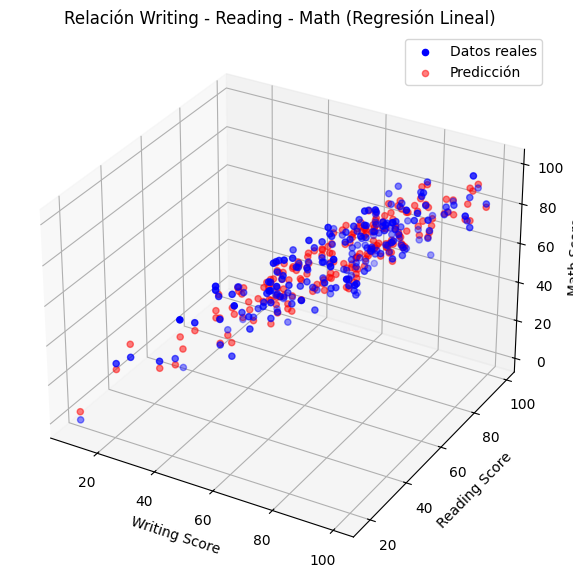

In [11]:
# Crear figura 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Datos reales
ax.scatter(X_test['writing_score'], X_test['reading_score'], y_test,
           color='blue', label='Datos reales')

# Predicciones
y_pred = lin_reg.predict(X_test)
ax.scatter(X_test['writing_score'], X_test['reading_score'], y_pred,
           color='red', label='Predicción', alpha=0.5)

# Etiquetas y título
ax.set_xlabel('Writing Score')
ax.set_ylabel('Reading Score')
ax.set_zlabel('Math Score')
ax.set_title('Relación Writing - Reading - Math (Regresión Lineal)')
ax.legend()

plt.show()

In [ ]:
import joblib
from google.colab import files

# Guardar el mejor modelo como archivo .pkl
joblib.dump(lin_reg, 'lin_reg_model_opt.pkl')

# Descargar el modelo guardado a tu PC
files.download('lin_reg_model_opt.pkl')